In [2]:
from astral import LocationInfo
from astral.sun import sun
import datetime
import pytz
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def find_midpoint(start_time, end_time):
    return start_time + (end_time - start_time) / 2

def get_color(progress, start_color, end_color, exponent=1):
    c1 = np.array(mcolors.hex2color(start_color))
    c2 = np.array(mcolors.hex2color(end_color))
    color = (1 - progress**exponent) * c1 + progress**exponent * c2
    print(color)
    return mcolors.to_hex(color)

def get_colors():
    london_tz = pytz.timezone('Europe/London')
    london_datetime = datetime.datetime.now(london_tz)
    london_old_datetime = datetime.datetime.now(london_tz) - datetime.timedelta(days=1)
    london_next_datetime = datetime.datetime.now(london_tz) + datetime.timedelta(days=1)

    london_date = london_datetime.date()
    london_old_date = london_old_datetime.date()
    london_next_date = london_next_datetime.date()

    city = LocationInfo(latitude=51.537052, longitude=-0.183325)
    s = sun(city.observer, date=london_date)
    y = sun(city.observer, date=london_old_date)
    n = sun(city.observer, date=london_next_date)

    old_dusk = y['dusk'].astimezone(london_tz)
    current_dawn = s['dawn'].astimezone(london_tz)
    old_midnight = find_midpoint(old_dusk, current_dawn)

    current_dusk = s['dusk'].astimezone(london_tz)
    current_sunrise = s['sunrise'].astimezone(london_tz)
    current_sunset = s['sunset'].astimezone(london_tz)
    current_noon = find_midpoint(current_sunrise, current_sunset)
    next_dawn = n['dawn'].astimezone(london_tz)
    current_midnight = find_midpoint(current_dusk, next_dawn)

    color_lookup = {
        'midnight': {
            'line': {
                'start': '#ced4da',
                'end': '#f8f9fa'
            },
            'background': {
                'start': '#6c757d',
                'end': '#212529',
            },
            'exponent': 0.25
        },
        'dawn': {
            'line': {
                'start': '#f8f9fa',
                'end': '#ced4da'
            },
            'background': {
                'start': '#212529',
                'end': '#6c757d'
            },
            'exponent': 4
        },
        'sunrise': {
            'line': {
                'start': '#ced4da',
                'end': '#6c757d'
            },
            'background': {
                'start': '#6c757d',
                'end': '#ced4da'
            },
            'exponent': 4
        },
        'afternoon': {
            'line': {
                'start': '#6c757d',
                'end': '#212529'
            },
            'background': {
                'start': '#ced4da',
                'end': '#f8f9fa'
            },
            'exponent': .25
        },
        'sunset': {
            'line': {
                'start': '#212529',
                'end': '#6c757d'
            },
            'background': {
                'start': '#f8f9fa',
                'end': '#ced4da'
            },
            'exponent': 4
        },
        'dusk': {
            'line': {
                'start': '#6c757d',
                'end': '#ced4da'
            },
            'background': {
                'start': '#ced4da',
                'end': '#6c757d'
            },
            'exponent': .25
        }
    }

    if london_datetime <= old_midnight:
        approaching = 'midnight' 
        progress = (london_datetime - old_dusk).seconds / (old_midnight - old_dusk).seconds
    elif london_datetime <= current_dawn:
        approaching = 'dawn'
        progress = (london_datetime - old_midnight).seconds / (current_dawn - old_midnight).seconds
    elif london_datetime <= current_sunrise:
        approaching = 'sunrise'
        progress = (london_datetime - current_dawn).seconds / (current_sunrise - current_dawn).seconds
    elif london_datetime <= current_noon:
        approaching = 'afternoon'
        progress = (london_datetime - current_sunrise).seconds / (current_noon - current_sunrise).seconds
    elif london_datetime <= current_sunset:
        approaching = 'sunset'
        progress = (london_datetime - current_noon).seconds / (current_sunset - current_noon).seconds
    elif london_datetime <= current_dusk:
        approaching = 'dusk'
        progress = (london_datetime - current_sunset).seconds / (current_dusk - current_sunset).seconds
    elif london_datetime <= current_midnight:
        approaching = 'midnight' 
        progress = (london_datetime - current_dusk).seconds / (current_midnight - current_dusk).seconds
    else:
        return None
    line_color = get_color(progress=progress, start_color=color_lookup[approaching]['line']['start'], end_color=color_lookup[approaching]['line']['end'], exponent=color_lookup[approaching]['exponent'])
    background_color = get_color(progress=progress, start_color=color_lookup[approaching]['background']['start'], end_color=color_lookup[approaching]['background']['end'], exponent=color_lookup[approaching]['exponent'])
    return london_datetime, approaching, progress, line_color, background_color

get_colors()

[0.13660916 0.15277526 0.1688454 ]
[0.96851848 0.97291987 0.97732127]


(datetime.datetime(2024, 7, 3, 16, 20, 41, 691186, tzinfo=<DstTzInfo 'Europe/London' BST+1:00:00 DST>),
 'sunset',
 0.3955156044843955,
 '#23272b',
 '#f7f8f9')

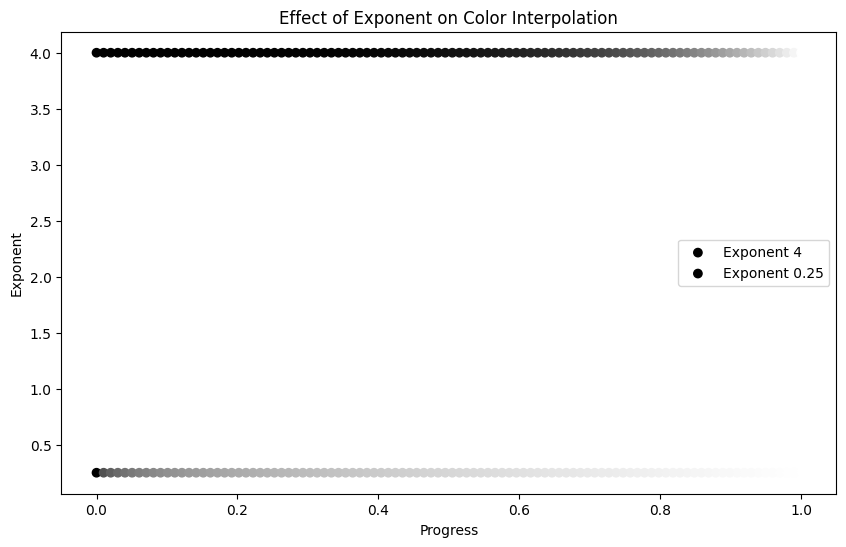

In [125]:
def get_color(progress, start_color, end_color, exponent=1):
    c1 = np.array(mcolors.hex2color(start_color))
    c2 = np.array(mcolors.hex2color(end_color))
    color = (1 - progress**exponent) * c1 + progress**exponent * c2
    return mcolors.to_hex(color)

# Test the function with different exponents
progress_values = np.linspace(0, 1, 100)
exponents = [4, .25]  # Added 0.5 to show root interpolation effect

start_color = "#000000"
end_color = "#FFFFFF"

plt.figure(figsize=(10, 6))

for exp in exponents:
    colors = [get_color(p, start_color, end_color, exponent=exp) for p in progress_values]
    plt.scatter(progress_values, [exp] * len(progress_values), c=colors, label=f'Exponent {exp}', marker='o')

plt.xlabel('Progress')
plt.ylabel('Exponent')
plt.title('Effect of Exponent on Color Interpolation')
plt.legend()
plt.show()
